# CS777 Final Project: Spotify Recommender System 
### Authors: Carolyn Wright, Heli Kolambekar, Rajat Sharma, Yash Kumar

**OBJECTIVE**


1.   Use the Spotify for Developers API to analyze Spotify data related to artists, song tracks and track characteristics.
2.   Stream real time song data using the Currently Playing Track API to get song track characteristics features.
3. Conduct exploratory data analysis of the dataset
4. Apply unsupervised machine learning algorithm to group the songs together then use supervised learning model to classify songs on the basis of track features
5. Developing a recommendation system to recommend songs on the basis of a user's song based on its label, popularity and year 



### QUERYING DATA FROM SPOTIFY API (HELI KOLAMBEKAR)


INITIALIZING THE SPOTIPY OBJECTS WITH SPOTIFY DEVELOPER CREDENTIALS 


In [ ]:
pip install spotipy


     |████████████████████████████████| 138 kB 21.3 MB/s 
     |████████████████████████████████| 63 kB 543 kB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd
import matplotlib.pyplot as plt

client_id = '50ec2cd2c02f4658887f59ede7f24dab'
client_secret = 'db7f5dcbd90a4dba8c64ce5d9b647f75'

client_credentials_manager = SpotifyClientCredentials(client_id, client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

FETCHING THE ARTIST NAME, TRACK NAME, TRACK ID, ARTIST ID FROM API

In [ ]:
name_of_artist = []
name_of_track = []
popularity_of_track = []
artistID= []
trackID= []
for i in range(0,1000,50):
    track_results = sp.search(q='year:2021', type='track', limit=50,offset=i)
    for i, t in enumerate(track_results['tracks']['items']):
        name_of_artist.append(t['artists'][0]['name'])
        artistID.append(t['artists'][0]['id'])
        name_of_track.append(t['name'])
        trackID.append(t['id'])
        popularity_of_track.append(t['popularity'])

CRATING A DATAFRAME USING THE QUERIED DATA

In [ ]:

data_track = pd.DataFrame({'name_of_artist' : name_of_artist, 'name_of_track' : name_of_track, 'trackID' : trackID, 'popularity_of_track' : popularity_of_track, 'artistID' : artistID})
data_track.head()

,name_of_artist,name_of_track,trackID,popularity_of_track,artistID
0,Olivia Rodrigo,good 4 u,4ZtFanR9U6ndgddUvNcjcG,90,1McMsnEElThX1knmY4oliG
1,LYMEY,END OF YEAR 2021,6usFCFN0F69JcAaHtB55sg,27,6dPOSlnP4zgYg7bkAkp4dY
2,Coldplay,My Universe,3FeVmId7tL5YN8B7R3imoM,86,4gzpq5DPGxSnKTe4SA8HAU
3,Elvis Costello & The Attractions,Pump It Up - 2021 Remaster,3oyc1mIdCBGaU55wX7otqM,60,4qmHkMxr6pTWh5Zo74odpH
4,Carolina Gaitán - La Gaita,We Don't Talk About Bruno,52xJxFP6TqMuO4Yt0eOkMz,87,29PgYEggDV3cDP9QYTogwv


ARTIST DATA - NAME OF ARTIST, ARTIST ID, GENRE OF ARTIST, ARTIST FOLLOWERS

In [ ]:
popularity_of_artist = []
genre_of_artist = []
artist_followers = []
for a_id in data_track.artistID:
  artist = sp.artist(a_id)
  popularity_of_artist.append(artist['popularity'])
  genre_of_artist.append(artist['genres'])
  artist_followers.append(artist['followers']['total'])

In [ ]:
data_track = data_track.assign(popularity_of_artist=popularity_of_artist, genre_of_artists=genre_of_artist, artist_followers=artist_followers)
data_track.head()

,name_of_artist,name_of_track,trackID,popularity_of_track,artistID,popularity_of_artist,genre_of_artists,artist_followers
0,Olivia Rodrigo,good 4 u,4ZtFanR9U6ndgddUvNcjcG,90,1McMsnEElThX1knmY4oliG,91,[pop],16248303
1,LYMEY,END OF YEAR 2021,6usFCFN0F69JcAaHtB55sg,27,6dPOSlnP4zgYg7bkAkp4dY,19,[],422
2,Coldplay,My Universe,3FeVmId7tL5YN8B7R3imoM,86,4gzpq5DPGxSnKTe4SA8HAU,92,"[permanent wave, pop]",35478011
3,Elvis Costello & The Attractions,Pump It Up - 2021 Remaster,3oyc1mIdCBGaU55wX7otqM,60,4qmHkMxr6pTWh5Zo74odpH,59,"[art rock, folk rock, mellow gold, new wave po...",227404
4,Carolina Gaitán - La Gaita,We Don't Talk About Bruno,52xJxFP6TqMuO4Yt0eOkMz,87,29PgYEggDV3cDP9QYTogwv,76,[],27827


FETCHING THE NUMERICAL FEATURES OF THE TRACK

In [ ]:
track_features = []
for t_id in data_track['trackID']:
  af = sp.audio_features(t_id)
  track_features.append(af)
data_track_feature = pd.DataFrame(columns = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms', 'time_signature'])
for item in track_features:
  for feat in item:
    data_track_feature = data_track_feature.append(feat, ignore_index=True)
data_track_feature.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.563,0.664,9,-5.044,1,0.1540,0.33500,0,0.0849,0.688,166.928,audio_features,4ZtFanR9U6ndgddUvNcjcG,spotify:track:4ZtFanR9U6ndgddUvNcjcG,https://api.spotify.com/v1/tracks/4ZtFanR9U6nd...,https://api.spotify.com/v1/audio-analysis/4ZtF...,178147,4
1,0.429,0.829,6,-5.071,0,0.0604,0.02380,0.000174,0.6730,0.278,127.083,audio_features,6usFCFN0F69JcAaHtB55sg,spotify:track:6usFCFN0F69JcAaHtB55sg,https://api.spotify.com/v1/tracks/6usFCFN0F69J...,https://api.spotify.com/v1/audio-analysis/6usF...,1472769,4
2,0.588,0.701,9,-6.390,1,0.0402,0.00813,0,0.2000,0.443,104.988,audio_features,3FeVmId7tL5YN8B7R3imoM,spotify:track:3FeVmId7tL5YN8B7R3imoM,https://api.spotify.com/v1/tracks/3FeVmId7tL5Y...,https://api.spotify.com/v1/audio-analysis/3FeV...,228000,4
3,0.645,0.809,11,-6.120,1,0.0385,0.00921,0.00108,0.1060,0.966,138.978,audio_features,3oyc1mIdCBGaU55wX7otqM,spotify:track:3oyc1mIdCBGaU55wX7otqM,https://api.spotify.com/v1/tracks/3oyc1mIdCBGa...,https://api.spotify.com/v1/audio-analysis/3oyc...,196680,4
4,0.577,0.450,0,-8.516,0,0.0834,0.35700,0,0.1110,0.830,205.863,audio_features,52xJxFP6TqMuO4Yt0eOkMz,spotify:track:52xJxFP6TqMuO4Yt0eOkMz,https://api.spotify.com/v1/tracks/52xJxFP6TqMu...,https://api.spotify.com/v1/audio-analysis/52xJ...,216120,4


IDENTIFYING AND DROPPING INSIGNIFICANT COLUMNS IN DATAFRAME 

In [ ]:
dropped_columns = ['key','mode','type', 'uri','track_href','analysis_url']
data_track_feature = data_track_feature.drop(columns=dropped_columns)
print(data_track.info())
print(data_track_feature.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   name_of_artist        1000 non-null   object
 1   name_of_track         1000 non-null   object
 2   trackID               1000 non-null   object
 3   popularity_of_track   1000 non-null   int64 
 4   artistID              1000 non-null   object
 5   popularity_of_artist  1000 non-null   int64 
 6   genre_of_artists      1000 non-null   object
 7   artist_followers      1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      1000 non-null   float64
 1   energy            1000 non-null   float64
 2   loudness          1000 non-null   float6

In [ ]:
data_track['name_of_artist'] = data_track['name_of_artist'].astype("string")
data_track['name_of_track'] = data_track['name_of_track'].astype("string")
data_track['trackID'] = data_track['trackID'].astype("string")
data_track['artistID'] = data_track['artistID'].astype("string")
data_track_feature['duration_ms'] = pd.to_numeric(data_track_feature['duration_ms'])
data_track_feature['instrumentalness'] = pd.to_numeric(data_track_feature['instrumentalness'])
data_track_feature['time_signature'] = data_track_feature['time_signature'].astype("category")
print(data_track.info())
print(data_track_feature.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   name_of_artist        1000 non-null   string
 1   name_of_track         1000 non-null   string
 2   trackID               1000 non-null   string
 3   popularity_of_track   1000 non-null   int64 
 4   artistID              1000 non-null   string
 5   popularity_of_artist  1000 non-null   int64 
 6   genre_of_artists      1000 non-null   object
 7   artist_followers      1000 non-null   int64 
dtypes: int64(3), object(1), string(4)
memory usage: 62.6+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   danceability      1000 non-null   float64 
 1   energy            1000 non-null   float64 
 2   loudness          1000 no

BEST TOP 20 TRACKS OF 2021 BASED ON POPULARITY

In [ ]:
data_track.sort_values(by=['popularity_of_track'], ascending=False)[['name_of_track', 'name_of_artist']].head(20)


,name_of_track,name_of_artist
24,abcdefu,GAYLE
114,Envolver,Anitta
8,Woman,Doja Cat
16,Enemy (with JID) - from the series Arcane Leag...,Imagine Dragons
0,good 4 u,Olivia Rodrigo
12,THATS WHAT I WANT,Lil Nas X
56,The Motto,Tiësto
54,Bad Habits,Ed Sheeran
140,Where Are You Now,Lost Frequencies
20,STAY (with Justin Bieber),The Kid LAROI


TOP 20 MOST POPULAR ARTISTS OF 2021

In [ ]:
sort_by_artist_followers = pd.DataFrame(data_track.sort_values(by=['artist_followers'], ascending=False)[['artist_followers','popularity_of_artist', 'name_of_artist','genre_of_artists']])
sort_by_artist_followers.astype(str).drop_duplicates().head(20)

,artist_followers,popularity_of_artist,name_of_artist,genre_of_artists
54,96284106,96,Ed Sheeran,"['pop', 'uk pop']"
326,62961306,98,Drake,"['canadian hip hop', 'canadian pop', 'hip hop'..."
518,61198677,93,Billie Eilish,"['art pop', 'electropop', 'pop']"
972,59954694,97,Justin Bieber,"['canadian pop', 'pop']"
844,55036747,95,Eminem,"['detroit hip hop', 'hip hop', 'rap']"
708,52410050,98,Taylor Swift,['pop']
192,48832326,96,BTS,"['k-pop', 'k-pop boy group']"
66,47395162,100,Bad Bunny,"['latin', 'reggaeton', 'trap latino']"
158,44222776,97,The Weeknd,"['canadian contemporary r&b', 'canadian pop', ..."
728,40047065,93,Bruno Mars,"['dance pop', 'pop']"


LIST OF GENRES 

In [ ]:
def fn_serialize(series):
 return pd.Series([x for _list in series for x in _list])
fn_serialize(data_track['genre_of_artists']).value_counts().head(20)

progressive house       221
trance                  203
uplifting trance        169
progressive trance      160
pop                     154
edm                     144
pop dance               140
rap                      97
dance pop                64
hip hop                  56
trap                     51
contemporary country     50
rock                     45
dutch trance             43
mellow gold              40
art rock                 40
folk rock                39
roots rock               37
power pop                36
pub rock                 36
dtype: int64

MOST POPULAR ARTISTS IN EVERY GENRE

In [ ]:
top_10_genres = list(fn_serialize(data_track['genre_of_artists']).value_counts().index[:20])
top_artists_by_genre = []
for genre in top_10_genres:
  for index, row in sort_by_artist_followers.iterrows():
    if genre in row['genre_of_artists']:
      top_artists_by_genre.append({'name_of_artist':row['name_of_artist'], 'genre_of_artist':genre})
      break
pd.json_normalize(top_artists_by_genre)

,name_of_artist,genre_of_artist
0,Armin van Buuren,progressive house
1,Tiësto,trance
2,Above & Beyond,uplifting trance
3,Above & Beyond,progressive trance
4,Ed Sheeran,pop
5,Marshmello,edm
6,Marshmello,pop dance
7,Drake,rap
8,Bruno Mars,dance pop
9,Drake,hip hop


In [ ]:
pip install pyspark

     |████████████████████████████████| 281.4 MB 33 kB/s 
     |████████████████████████████████| 198 kB 43.9 MB/s 
  Created wheel for pyspark: filename=pyspark-3.2.1-py2.py3-none-any.whl size=281853642 sha256=e2151592370eb0bef2a7d2ce5a5974480a2ccc4c3cc107884557d34ef4856ea6
  Stored in directory: /root/.cache/pip/wheels/9f/f5/07/7cd8017084dce4e93e84e92efd1e1d5334db05f2e83bcef74f
Successfully built pyspark


In [ ]:
import pyspark

In [ ]:
import os
import sys

#os.environ['PYSPARK_PYTHON'] = sys.executable
#os.environ['PYSPARK_DRIVER_PYTHON'] = sys.executable

from pyspark.context import SparkContext
from pyspark.sql.session import SparkSession
sc = SparkContext.getOrCreate()
spark = SparkSession(sc)

In [ ]:
from pyspark import SparkContext

from pyspark.sql import SparkSession

from pyspark.sql.window import Window

from pyspark.sql.functions import col, expr, when,\
desc, first, last, row_number, rank, substring

from pyspark.sql.functions import max as pmax, min as pmin

In [ ]:
spark = SparkSession.Builder().appName(
    "Spotify_Final").getOrCreate()
spark

### STREAMING REAL TIME DATA USING SPOTIFY API

In [ ]:
import requests
import time

In [ ]:
from pprint import pprint

In [ ]:

SPOTIFY_GET_CURRENT_TRACK_URL = 'https://api.spotify.com/v1/me/player/currently-playing'

In [ ]:
ACCESS_TOKEN = 'BQBpqeXVSd-wYKVEjwEQVpOmI550Q3sVgzZENrRMb8H7r0I6Smd2x3jJOK2aWdc9hQPz-LX8aADqinW9chaSzbYqNhFMOt3WtQJLn1tYPu1s_jm1iI_Fdm5zX-ggyT8r4tXrr-CAc40hloUJ3dH-wqC7zCcBBBVtIBpS'

In [ ]:
def get_current_track(access_token):
    response = requests.get(
        SPOTIFY_GET_CURRENT_TRACK_URL,
        headers={
            "Authorization": f"Bearer {access_token}"
        }
    )
    json_resp = response.json()

    track_id = json_resp['item']['id']
    track_name = json_resp['item']['name']
    artists = [artist for artist in json_resp['item']['artists']]

    link = json_resp['item']['external_urls']['spotify']

    artist_names = ', '.join([artist['name'] for artist in artists])

    current_track_info = {
    	"id": track_id,
    	"track_name": track_name,
    	"artists": artist_names,
    	"link": link
    }

    return current_track_info

In [ ]:
def main():
	current_track_id = None
	while True:
	    current_track_info = get_current_track(ACCESS_TOKEN)

	    if current_track_info['id'] != current_track_id:
		    pprint(
		    	current_track_info,
		    	indent=4,
		    )
		    current_track_id = current_track_info['id']

	    time.sleep(1)

### STREAMING REAL TIME SONGS FROM SPOTIFY 

In [ ]:
# PLEASE UPLOAD THE VIDEO DEMONSTRATION FILE HERE TO VIEW IN GOOGLE COLAB

from google.colab import files
uploaded = files.upload()

Saving REAL_TIME_STREAMING.mp4 to REAL_TIME_STREAMING.mp4


In [ ]:
## for large videos
!pip install -U kora
from kora.drive import upload_public
url = upload_public('REAL_TIME_STREAMING.mp4')
# then display it
from IPython.display import HTML
HTML(f"""<video src={url} width=500 controls/>""")

### Exploratory Data Analysis (Carolyn Wright)

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Spotify_data.csv to Spotify_data.csv


In [ ]:
df_csv1 = spark.read.csv('Spotify_data.csv', header=True)
df_csv1

DataFrame[valence: string, year: string, acousticness: string, artists: string, danceability: string, duration_ms: string, energy: string, explicit: string, id: string, instrumentalness: string, key: string, liveness: string, loudness: string, mode: string, name: string, popularity: string, release_date: string, speechiness: string, tempo: string]

In [ ]:
df_csv1.show(5)


+-------+----+------------+--------------------+------------+-----------+------+--------+--------------------+----------------+---+--------+--------+----+--------------------+----------+------------+-----------+-------+
|valence|year|acousticness|             artists|danceability|duration_ms|energy|explicit|                  id|instrumentalness|key|liveness|loudness|mode|                name|popularity|release_date|speechiness|  tempo|
+-------+----+------------+--------------------+------------+-----------+------+--------+--------------------+----------------+---+--------+--------+----+--------------------+----------+------------+-----------+-------+
| 0.0594|1921|       0.982|['Sergei Rachmani...|       0.279|     831667| 0.211|       0|4BJqT0PrAfrxzMOxy...|           0.878| 10|   0.665| -20.096|   1|Piano Concerto No...|         4|        1921|     0.0366| 80.954|
|  0.963|1921|       0.732|      ['Dennis Day']|       0.819|     180533| 0.341|       0|7xPhfUan2yNtyFG0c...|          

In [ ]:
df_csv1.count()


170653

In [ ]:
df_csv1.printSchema()

root
 |-- valence: string (nullable = true)
 |-- year: string (nullable = true)
 |-- acousticness: string (nullable = true)
 |-- artists: string (nullable = true)
 |-- danceability: string (nullable = true)
 |-- duration_ms: string (nullable = true)
 |-- energy: string (nullable = true)
 |-- explicit: string (nullable = true)
 |-- id: string (nullable = true)
 |-- instrumentalness: string (nullable = true)
 |-- key: string (nullable = true)
 |-- liveness: string (nullable = true)
 |-- loudness: string (nullable = true)
 |-- mode: string (nullable = true)
 |-- name: string (nullable = true)
 |-- popularity: string (nullable = true)
 |-- release_date: string (nullable = true)
 |-- speechiness: string (nullable = true)
 |-- tempo: string (nullable = true)



In [ ]:
#create df with just id info
df_csv_id1 = df_csv1.select('year','mode', "release_date", "id", "name", 'artists')
#df_csv_id.printSchema()

#Drop year, key, mode, release_date and id
df_csv1 = df_csv1.drop('year','mode', "release_date","name", 'artists')
#df_csv.printSchema()

In [ ]:
df_csv1.describe().show()

+-------+------------------+-------------------+-------------------+------------------+-------------------+-------------------+--------------------+-------------------+-----------------+-------------------+-------------------+------------------+-------------------+------------------+
|summary|           valence|       acousticness|       danceability|       duration_ms|             energy|           explicit|                  id|   instrumentalness|              key|           liveness|           loudness|        popularity|        speechiness|             tempo|
+-------+------------------+-------------------+-------------------+------------------+-------------------+-------------------+--------------------+-------------------+-----------------+-------------------+-------------------+------------------+-------------------+------------------+
|  count|            170653|             170653|             170653|            170653|             170653|             170653|              1706

In [ ]:
#Convert features to numeric
columns = ['valence',
 'acousticness',
 'danceability',
 'duration_ms',
 'energy',
 'explicit',
 'instrumentalness',
 'liveness',
 'loudness',
 'popularity',
 'speechiness',
 'tempo',
 'key']

for c in columns:
    df_csv1=df_csv1.withColumn(c, df_csv1[c].cast('float'))

df_csv1.printSchema()



root
 |-- valence: float (nullable = true)
 |-- acousticness: float (nullable = true)
 |-- danceability: float (nullable = true)
 |-- duration_ms: float (nullable = true)
 |-- energy: float (nullable = true)
 |-- explicit: float (nullable = true)
 |-- id: string (nullable = true)
 |-- instrumentalness: float (nullable = true)
 |-- key: float (nullable = true)
 |-- liveness: float (nullable = true)
 |-- loudness: float (nullable = true)
 |-- popularity: float (nullable = true)
 |-- speechiness: float (nullable = true)
 |-- tempo: float (nullable = true)



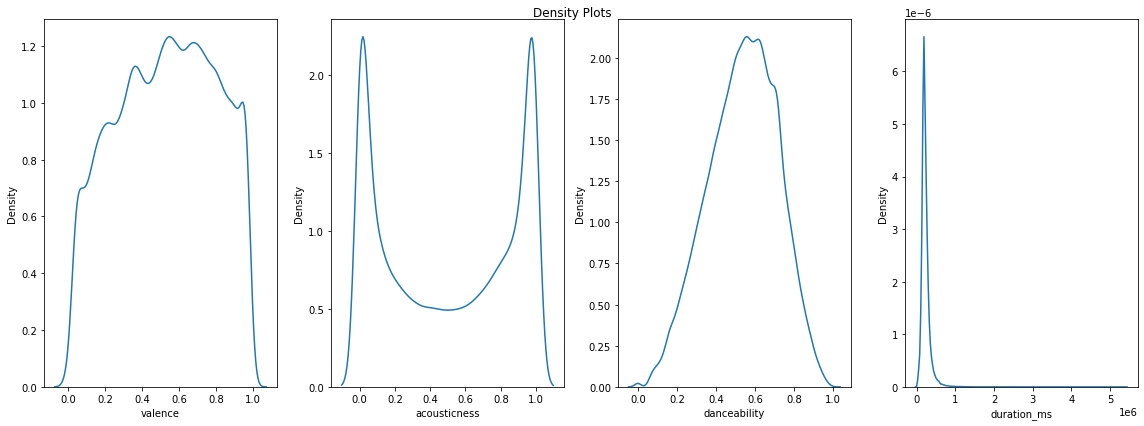

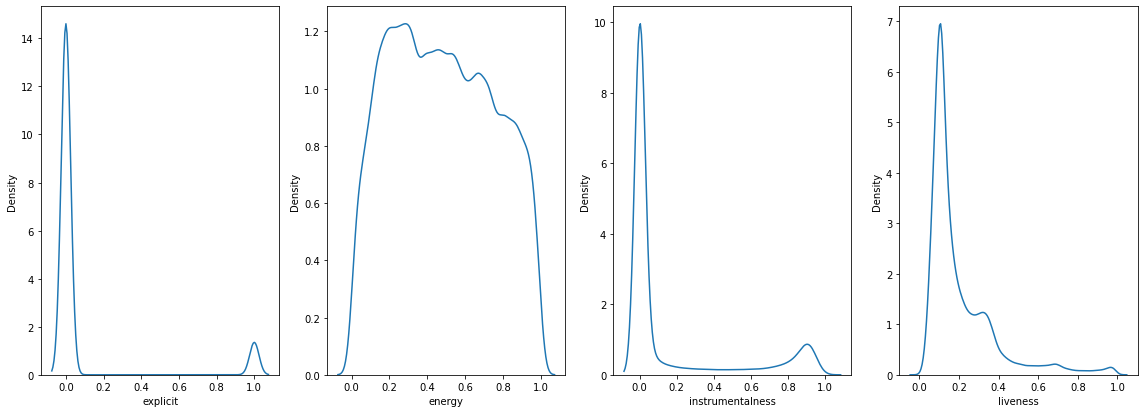

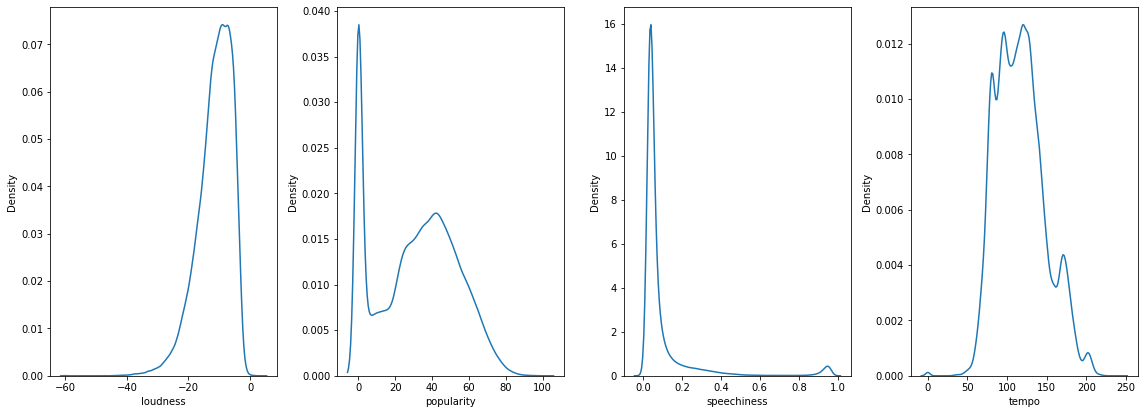

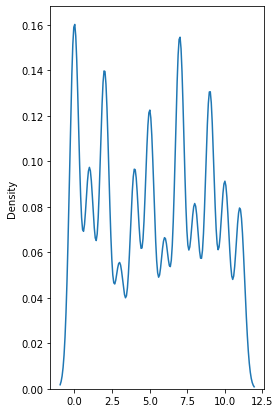

In [ ]:
#Plot density of all features

import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

df_csv_plot = df_csv1.select('valence', 'acousticness','danceability',
                         'duration_ms','explicit','energy',
                         'instrumentalness','liveness','loudness',
                         'popularity','speechiness','tempo', 'key')

df_csv_pd = df_csv_plot.toPandas()


### PLOT BUILD
fig, ax = plt.subplots(nrows= 1, ncols= 4, figsize=(16,6))

for i,col in enumerate(df_csv_pd.columns[0:4]):
  sns.distplot(df_csv_pd[col], hist = False, ax=ax[i])

fig.suptitle('Density Plots')
fig.tight_layout()
fig.subplots_adjust(top=0.95)

plt.show()
plt.clf()
plt.close()

fig, ax = plt.subplots(nrows= 1, ncols= 4, figsize=(16,6))

for i,col in enumerate(df_csv_pd.columns[4:8]):
  sns.distplot(df_csv_pd[col], hist = False, ax=ax[i])

fig.tight_layout()
fig.subplots_adjust(top=0.95)

plt.show()
plt.clf()
plt.close()

fig, ax = plt.subplots(nrows= 1, ncols= 4, figsize=(16,6))

for i,col in enumerate(df_csv_pd.columns[8:12]):
  sns.distplot(df_csv_pd[col], hist = False, ax=ax[i])

fig.tight_layout()
fig.subplots_adjust(top=0.95)

plt.show()
plt.clf()
plt.close()

df_csv_plot = df_csv1.select( 'key')

df_csv_pd = df_csv_plot.toPandas()
fig, ax = plt.subplots(nrows= 1, ncols= 1, figsize=(4,6))

sns.distplot(df_csv_pd, hist = False)


fig.tight_layout()
fig.subplots_adjust(top=0.95)

plt.show()
plt.clf()
plt.close()


In [ ]:
#Scale variables for machine learning models

from pyspark.ml.feature import MinMaxScaler
from pyspark.ml.feature import VectorAssembler
from pyspark.ml import Pipeline
from pyspark.sql.functions import udf
from pyspark.sql.types import DoubleType

# UDF for converting column type from vector to double type
unlist = udf(lambda x: round(float(list(x)[0]),3), DoubleType())


for c in columns:
    # VectorAssembler Transformation - Converting column to vector type
    assembler = VectorAssembler(inputCols=[c],outputCol=c+"_Vect")

    # MinMaxScaler Transformation
    scaler = MinMaxScaler(inputCol=c+"_Vect", outputCol=c+"_Scaled")

    # Pipeline of VectorAssembler and MinMaxScaler
    pipeline = Pipeline(stages=[assembler, scaler])

    # Fitting pipeline on dataframe
    df_csv1 = pipeline.fit(df_csv1).transform(df_csv1).withColumn(c+"_Scaled", unlist(c+"_Scaled")).drop(c+"_Vect")

print("After Scaling :")
df_csv1.show(5)


After Scaling :
+-------+------------+------------+-----------+------+--------+--------------------+----------------+----+--------+--------+----------+-----------+-------+--------------+-------------------+-------------------+------------------+-------------+---------------+-----------------------+---------------+---------------+-----------------+------------------+------------+----------+
|valence|acousticness|danceability|duration_ms|energy|explicit|                  id|instrumentalness| key|liveness|loudness|popularity|speechiness|  tempo|valence_Scaled|acousticness_Scaled|danceability_Scaled|duration_ms_Scaled|energy_Scaled|explicit_Scaled|instrumentalness_Scaled|liveness_Scaled|loudness_Scaled|popularity_Scaled|speechiness_Scaled|tempo_Scaled|key_Scaled|
+-------+------------+------------+-----------+------+--------+--------------------+----------------+----+--------+--------+----------+-----------+-------+--------------+-------------------+-------------------+------------------+-

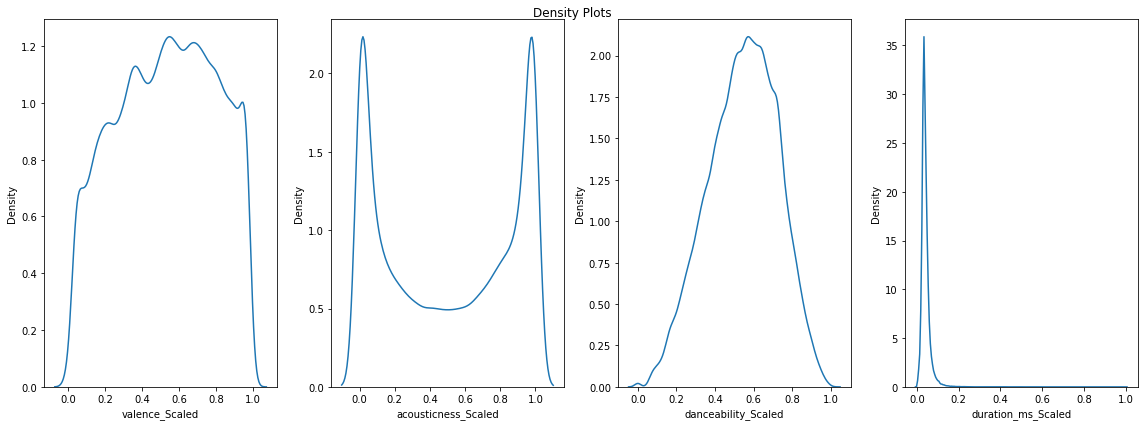

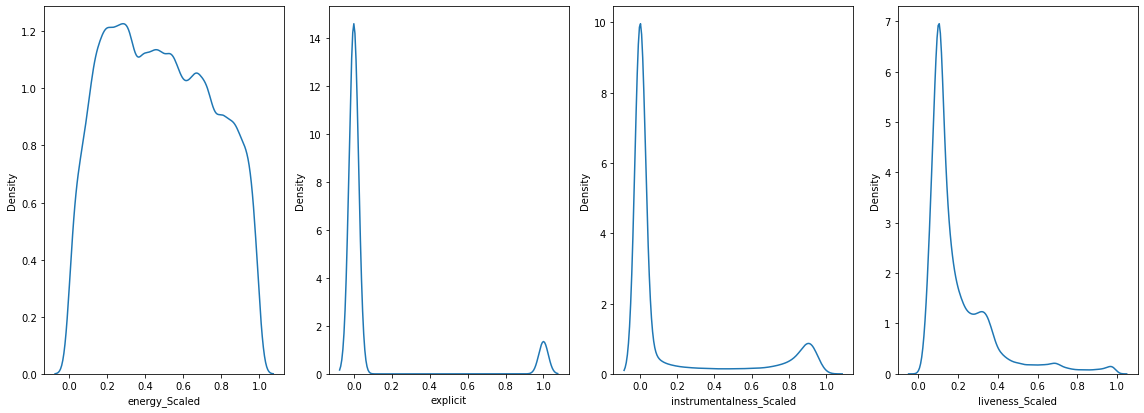

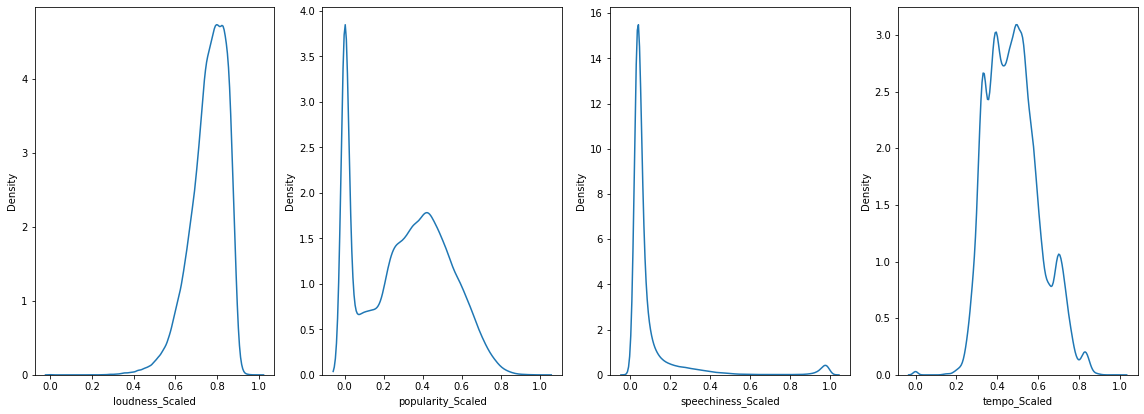

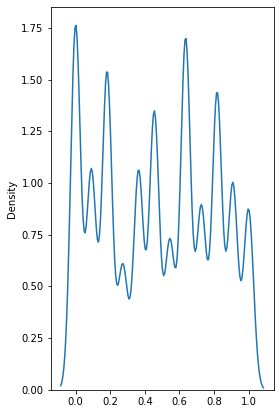

In [ ]:
#plot variables after scaling to confirm

df_csv_pd = df_csv1['valence_Scaled', 'acousticness_Scaled', 'danceability_Scaled', 'duration_ms_Scaled', 
                   'energy_Scaled', 'explicit', 'instrumentalness_Scaled', 'liveness_Scaled', 
                   'loudness_Scaled', 'popularity_Scaled', 'speechiness_Scaled', 'tempo_Scaled', 'key_Scaled'].toPandas()
warnings.filterwarnings('ignore')


### PLOT BUILD
fig, ax = plt.subplots(nrows= 1, ncols= 4, figsize=(16,6))

for i,col in enumerate(df_csv_pd.columns[0:4]):
  sns.distplot(df_csv_pd[col], hist = False, ax=ax[i])

fig.suptitle('Density Plots')
fig.tight_layout()
fig.subplots_adjust(top=0.95)

plt.show()
plt.clf()
plt.close()

fig, ax = plt.subplots(nrows= 1, ncols= 4, figsize=(16,6))

for i,col in enumerate(df_csv_pd.columns[4:8]):
  sns.distplot(df_csv_pd[col], hist = False, ax=ax[i])

fig.tight_layout()
fig.subplots_adjust(top=0.95)

plt.show()
plt.clf()
plt.close()

fig, ax = plt.subplots(nrows= 1, ncols= 4, figsize=(16,6))

for i,col in enumerate(df_csv_pd.columns[8:12]):
  sns.distplot(df_csv_pd[col], hist = False, ax=ax[i])

fig.tight_layout()
fig.subplots_adjust(top=0.95)

plt.show()
plt.clf()
plt.close()

df_csv_plot = df_csv1.select( 'key_Scaled')

df_csv_pd = df_csv_plot.toPandas()

fig, ax = plt.subplots(nrows= 1, ncols= 1, figsize=(4,6))

sns.distplot(df_csv_pd, hist = False)


fig.tight_layout()
fig.subplots_adjust(top=0.95)

plt.show()
plt.clf()
plt.close()


In [ ]:
#join scaled vars back with id info vars 
df_csv_1 = df_csv_id1.join(df_csv1, "id")
df_csv_1.count()

df_csv_1 = df_csv_1.drop('valence', 'acousticness','danceability',
                         'duration_ms','energy', 'explicit_Scaled',
                         'instrumentalness','liveness','loudness',
                         'popularity','speechiness','tempo', 'key')
df_csv_1.printSchema()

root
 |-- id: string (nullable = true)
 |-- year: string (nullable = true)
 |-- mode: string (nullable = true)
 |-- release_date: string (nullable = true)
 |-- name: string (nullable = true)
 |-- artists: string (nullable = true)
 |-- explicit: float (nullable = true)
 |-- valence_Scaled: double (nullable = true)
 |-- acousticness_Scaled: double (nullable = true)
 |-- danceability_Scaled: double (nullable = true)
 |-- duration_ms_Scaled: double (nullable = true)
 |-- energy_Scaled: double (nullable = true)
 |-- instrumentalness_Scaled: double (nullable = true)
 |-- liveness_Scaled: double (nullable = true)
 |-- loudness_Scaled: double (nullable = true)
 |-- popularity_Scaled: double (nullable = true)
 |-- speechiness_Scaled: double (nullable = true)
 |-- tempo_Scaled: double (nullable = true)
 |-- key_Scaled: double (nullable = true)



In [ ]:
#replace original vars with scaled
df_csv_1 = df_csv_1.withColumnRenamed("valence_Scaled","valence")\
.withColumnRenamed("energy_Scaled","energy")\
.withColumnRenamed("acousticness_Scaled","acousticness")\
.withColumnRenamed("danceability_Scaled","danceability")\
.withColumnRenamed("duration_ms_Scaled","duration_ms")\
.withColumnRenamed("instrumentalness_Scaled","instrumentalness")\
.withColumnRenamed("liveness_Scaled","liveness")\
.withColumnRenamed("popularity_Scaled","popularity")\
.withColumnRenamed("speechiness_Scaled","speechiness")\
.withColumnRenamed("tempo_Scaled","tempo")\
.withColumnRenamed("loudness_Scaled","loudness")\
.withColumnRenamed("key_Scaled","key")

df_csv_1.show()

+--------------------+----+----+------------+--------------------+--------------------+--------+-------+------------+------------+-----------+------+----------------+--------+--------+----------+-----------+-----+-----+
|                  id|year|mode|release_date|                name|             artists|explicit|valence|acousticness|danceability|duration_ms|energy|instrumentalness|liveness|loudness|popularity|speechiness|tempo|  key|
+--------------------+----+----+------------+--------------------+--------------------+--------+-------+------------+------------+-----------+------+----------------+--------+--------+----------+-----------+-----+-----+
|4BJqT0PrAfrxzMOxy...|1921|   1|        1921|Piano Concerto No...|['Sergei Rachmani...|     0.0|  0.059|       0.986|       0.282|      0.153| 0.211|           0.878|   0.665|   0.625|      0.04|      0.038|0.332|0.909|
|7xPhfUan2yNtyFG0c...|1921|   1|        1921|Clancy Lowered th...|      ['Dennis Day']|     0.0|  0.963|       0.735|   

In [ ]:
#Convert features to numeric
columns = ['valence',
 'acousticness',
 'danceability',
 'duration_ms',
 'energy',
 'instrumentalness',
 'liveness',
 'loudness',
 'popularity',
 'speechiness',
 'tempo',
 'explicit',
 'key']
 
for c in columns:
    df_csv_1=df_csv_1.withColumn(c, df_csv_1[c].cast('float'))

df_csv_1.printSchema()

root
 |-- id: string (nullable = true)
 |-- year: string (nullable = true)
 |-- mode: string (nullable = true)
 |-- release_date: string (nullable = true)
 |-- name: string (nullable = true)
 |-- artists: string (nullable = true)
 |-- explicit: float (nullable = true)
 |-- valence: float (nullable = true)
 |-- acousticness: float (nullable = true)
 |-- danceability: float (nullable = true)
 |-- duration_ms: float (nullable = true)
 |-- energy: float (nullable = true)
 |-- instrumentalness: float (nullable = true)
 |-- liveness: float (nullable = true)
 |-- loudness: float (nullable = true)
 |-- popularity: float (nullable = true)
 |-- speechiness: float (nullable = true)
 |-- tempo: float (nullable = true)
 |-- key: float (nullable = true)



In [ ]:
df_csv_1.printSchema()

root
 |-- id: string (nullable = true)
 |-- year: string (nullable = true)
 |-- mode: string (nullable = true)
 |-- release_date: string (nullable = true)
 |-- name: string (nullable = true)
 |-- artists: string (nullable = true)
 |-- explicit: float (nullable = true)
 |-- valence: float (nullable = true)
 |-- acousticness: float (nullable = true)
 |-- danceability: float (nullable = true)
 |-- duration_ms: float (nullable = true)
 |-- energy: float (nullable = true)
 |-- instrumentalness: float (nullable = true)
 |-- liveness: float (nullable = true)
 |-- loudness: float (nullable = true)
 |-- popularity: float (nullable = true)
 |-- speechiness: float (nullable = true)
 |-- tempo: float (nullable = true)
 |-- key: float (nullable = true)



In [ ]:
#Investigate correlations
df_csv_corr = df_csv_1.drop('id','year', 'release_date','name', 'artists')

df_csv_pd = df_csv_corr.toPandas()

corr = df_csv_pd.corr()
corr.style.background_gradient(cmap='coolwarm')

,explicit,valence,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,popularity,speechiness,tempo,key
explicit,1.000000,-0.018612,-0.246008,0.241777,-0.048902,0.132723,-0.140981,0.039640,0.140292,0.191543,0.414067,0.011961,0.005410
valence,-0.018612,1.000000,-0.184115,0.558935,-0.191805,0.353877,-0.198497,0.003834,0.313519,0.014200,0.046380,0.171689,0.028467
acousticness,-0.246008,-0.184115,1.000000,-0.266855,-0.076393,-0.749405,0.329820,-0.024481,-0.561717,-0.573164,-0.043979,-0.207134,-0.020513
danceability,0.241777,0.558935,-0.266855,1.000000,-0.139879,0.221947,-0.278059,-0.100188,0.285022,0.199586,0.235564,0.001813,0.024419
duration_ms,-0.048902,-0.191805,-0.076393,-0.139879,1.000000,0.042134,0.084709,0.047174,-0.003017,0.059587,-0.084576,-0.025439,-0.004239
energy,0.132723,0.353877,-0.749405,0.221947,0.042134,1.000000,-0.281098,0.126191,0.782369,0.485005,-0.070567,0.250870,0.027686
instrumentalness,-0.140981,-0.198497,0.329820,-0.278059,0.084709,-0.281098,1.000000,-0.047190,-0.408601,-0.296749,-0.121692,-0.105364,-0.014576
liveness,0.039640,0.003834,-0.024481,-0.100188,0.047174,0.126191,-0.047190,1.000000,0.056436,-0.076467,0.134661,0.007714,0.000208
loudness,0.140292,0.313519,-0.561717,0.285022,-0.003017,0.782369,-0.408601,0.056436,1.000000,0.457052,-0.139311,0.209791,0.017356
popularity,0.191543,0.014200,-0.573164,0.199586,0.059587,0.485005,-0.296749,-0.076467,0.457052,1.000000,-0.171980,0.133306,0.007806


### Machine Learning (Yash Kumar)

Finding Optimal CLusters for the whole Dataset 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
dfz = df_csv_1.toPandas()
dfz = dfz.drop(['id','name','year','artists','release_date'], axis = 1)

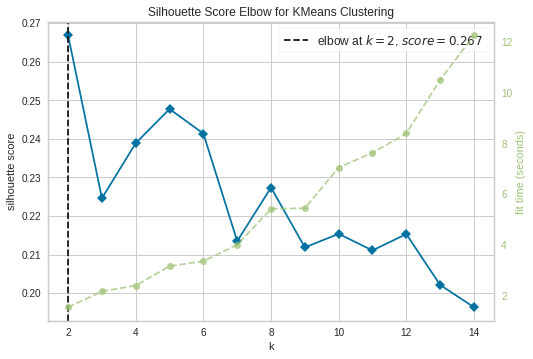

In [ ]:
#this block will take an hour to run
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,15),metric='silhouette', timings= True)
visualizer.fit(dfz)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

Choosing k=5 as  (the 2nd best silhouette score)

**Grouping Similar Songs together using Kmeans** 

In [ ]:
from pyspark.ml.feature import VectorAssembler
features =   ('valence',
 'acousticness',
 'danceability',
 'duration_ms',
 'energy',
 'explicit',
 'instrumentalness',
 'key',
 'liveness',
 'loudness',
 'popularity',
 'speechiness',
 'tempo') 
assembler = VectorAssembler(inputCols=features,outputCol="features",handleInvalid="skip")
dataset=assembler.transform(df_csv1)
dataset.select("features").show(truncate=False)

+--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|features                                                                                                                                                                                                |
+--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|[0.05939999967813492,0.9819999933242798,0.27900001406669617,831667.0,0.210999995470047,0.0,0.878000020980835,10.0,0.6650000214576721,-20.09600067138672,4.0,0.03660000115633011,80.9540023803711]       |
|[0.9629999995231628,0.7319999933242798,0.8190000057220459,180533.0,0.3409999907016754,0.0,0.0,7.0,0.1599999964237213,-12.440999984741211,5.0,0.41499999165534973,60.93600082397461]        

In [ ]:
from pyspark.ml.evaluation import ClusteringEvaluator
from pyspark.ml.clustering import KMeans
# Trains a k-means model.
kmeans = KMeans().setK(5).setSeed(1)
model = kmeans.fit(dataset)
# Make predictions
predictions = model.transform(dataset)
predictions.select('features','prediction').show(5)


+--------------------+----------+
|            features|prediction|
+--------------------+----------+
|[0.05939999967813...|         1|
|[0.96299999952316...|         4|
|[0.03940000012516...|         2|
|[0.16500000655651...|         0|
|[0.25299999117851...|         4|
+--------------------+----------+
only showing top 5 rows



**Now, we have the dataset labelled. We will train the model to be able to categorize the songs (assign labels) in user's playlist we pass to it.** 

**RF MODEL**


In [ ]:
df1 = predictions.withColumnRenamed("prediction","labels")

In [ ]:
from pyspark.ml.feature import StringIndexer, VectorIndexer

labelIndexer = StringIndexer(inputCol="labels", outputCol="indexedLabel").fit(df1)


In [ ]:
featureIndexer =\
    VectorIndexer(inputCol="features", 
                  outputCol="indexedFeatures", 
                  maxCategories=4).fit(predictions)

featureIndexer.categoryMaps.size()

1

Removing some songs and assigning it as User's Playlist to recommend songs based on its queue

In [ ]:
(Songs_Dataset, User_sample_set) = df1.randomSplit([0.8, 0.2], seed=0)


In [ ]:
from pyspark.ml.classification import RandomForestClassifier

rf = RandomForestClassifier(
    labelCol="indexedLabel", 
    featuresCol="indexedFeatures", 
    numTrees=10, seed=0)

In [ ]:
from pyspark.ml.feature import \
    IndexToString
labelConverter = IndexToString(inputCol="labels", outputCol="predictedLabel",
                               labels=labelIndexer.labels)

In [ ]:
from pyspark.ml import Pipeline

pipeline = Pipeline(stages=[labelIndexer, 
                            featureIndexer, 
                            rf,
                            labelConverter])

In [ ]:
model = pipeline.fit(Songs_Dataset)

# Make predictions.
predictions1 = model.transform(User_sample_set)


# Select example rows to display.
predictions1.select("predictedLabel", "features").show(5)

+--------------+----------+--------------------+
|predictedLabel|prediction|            features|
+--------------+----------+--------------------+
|             4|       1.0|[0.0,0.1190000027...|
|             3|       0.0|[0.0,0.1270000040...|
|             3|       0.0|(13,[1,3,4,6,7,8,...|
|             3|       0.0|[0.0,0.2860000133...|
|             3|       0.0|[0.0,0.3939999938...|
+--------------+----------+--------------------+
only showing top 5 rows



Now, we have the user's songs with labels predicted by our model

As we have removed the songs from the original dataset after assigning the labels, we can check the accuracy of our model as well

In [ ]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

evaluator = MulticlassClassificationEvaluator(
    labelCol="indexedLabel", 
    predictionCol="prediction", 
    metricName="accuracy")

accuracy = evaluator.evaluate(predictions1)

print("Accuracy =", accuracy)

Accuracy = 0.9574845768827843


In [ ]:
predictions1.select('predictedLabel').take(10)

[Row(predictedLabel='4'),
 Row(predictedLabel='3'),
 Row(predictedLabel='3'),
 Row(predictedLabel='3'),
 Row(predictedLabel='3'),
 Row(predictedLabel='3'),
 Row(predictedLabel='2'),
 Row(predictedLabel='2'),
 Row(predictedLabel='3'),
 Row(predictedLabel='3')]

### RECOMENDATION ALGORITHM (Rajat Sharma)

In [ ]:
df2= df_csv_1
df2.show(5)

+--------------------+----+----+------------+--------------------+--------------------+--------+-------+------------+------------+-----------+------+----------------+--------+--------+----------+-----------+-----+-----+
|                  id|year|mode|release_date|                name|             artists|explicit|valence|acousticness|danceability|duration_ms|energy|instrumentalness|liveness|loudness|popularity|speechiness|tempo|  key|
+--------------------+----+----+------------+--------------------+--------------------+--------+-------+------------+------------+-----------+------+----------------+--------+--------+----------+-----------+-----+-----+
|4BJqT0PrAfrxzMOxy...|1921|   1|        1921|Piano Concerto No...|['Sergei Rachmani...|     0.0|  0.059|       0.986|       0.282|      0.153| 0.211|           0.878|   0.665|   0.625|      0.04|      0.038|0.332|0.909|
|7xPhfUan2yNtyFG0c...|1921|   1|        1921|Clancy Lowered th...|      ['Dennis Day']|     0.0|  0.963|       0.735|   

Getting the name of the Artist and the Song for the user playlist from Original Dataset 

In [ ]:
df_song = df2.select('artists','name','year')
(Songs_Dataset_n, User_sample_set_n) = df_song.randomSplit([0.8, 0.2], seed=0)

In [ ]:
User_sample_set_n.show(1)

+--------------------+--------------------+----+
|             artists|                name|year|
+--------------------+--------------------+----+
|"[""Anita O'Day""...|Thanks For The Bo...|1932|
+--------------------+--------------------+----+
only showing top 1 row



In [ ]:
a = predictions.select('prediction').toPandas()
b = df2.toPandas()
b['labels'] = a['prediction']
b = b.dropna(axis='columns', how='all')
df_2 = spark.createDataFrame(b) 

Recommending Songs based on the above song's Label, Popularity and Year

In [ ]:
df_2n = df_2.filter(df_2.labels==int(predictions1.collect()[0][13]))
df_2n = df_2n.sort(df_2n.popularity.desc())
df_2n = df_2n.filter(df_2n.year==int(User_sample_set_n.collect()[0][2]))
df_2n.select("artists", "name").show(5, truncate=False)

+--------------------------------------+----------------------------------+
|artists                               |name                              |
+--------------------------------------+----------------------------------+
|['Vittorio De Sica']                  |Parlami D'Amore Mariù             |
|['Val Rosing']                        |Try A Little Tenderness           |
|['Guy Lombardo & His Royal Canadians']|Moonlight Saving Time             |
|['Ernesto Bonino']                    |Macariolita                       |
|['Francisco Canaro'; 'Agustín Irusta']|El Jardín del Amor - Remasterizado|
+--------------------------------------+----------------------------------+
only showing top 5 rows



Above are the songs recommended for the most recent song in the User Sample playlist

In [ ]:
sc.stop()